In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Neel\Downloads\1568699544_comcast_telecom_complaints_data (1)\Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

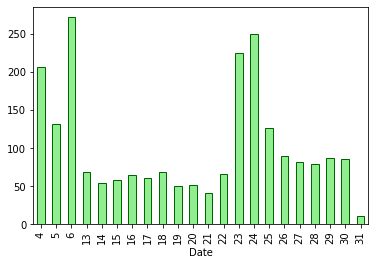

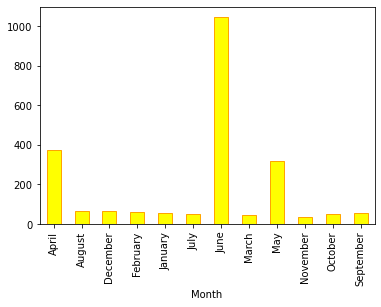

In [7]:
## - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

df['Month'] =pd.to_datetime(df['Date_month_year']).dt.month_name()
df['Date'] = pd.to_datetime(df['Date_month_year']).dt.day

#graph for date
df.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar',color='lightgreen',edgecolor='darkgreen')
plt.show()
#graph for month
df.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color='yellow',edgecolor='orange')
plt.show()


In [8]:
## - Provide a table with the frequency of complaint types.
df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


In [9]:
## - Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
df['Customer Complaint'].value_counts().head()

Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Comcast Billing     11
Name: Customer Complaint, dtype: int64

In [25]:
## - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and 
## Closed & Solved is to be categorized as Closed.
df['Status'] = df['Status'].apply(lambda x:'Open'if((x=='Open')|(x=='Pending'))else 'Closed')

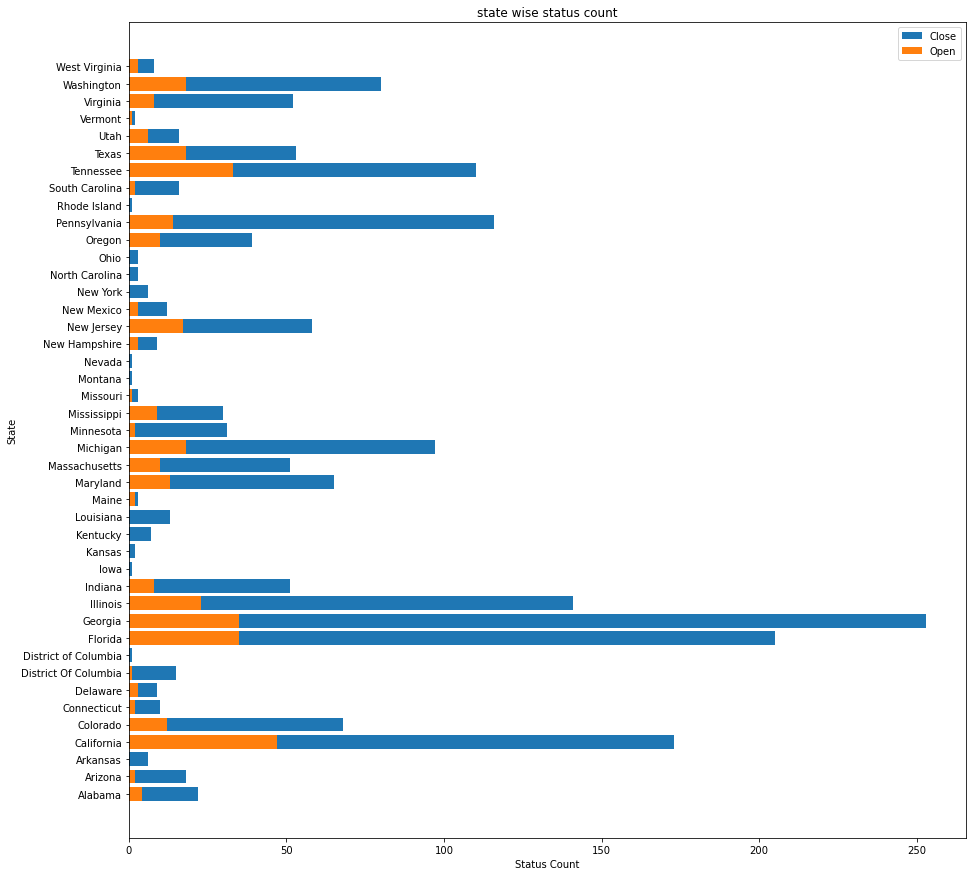

In [26]:
## - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
open= df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
close=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()
fig = plt.figure(figsize=(15,15))
plt.barh(close.State,close.Status)
plt.barh(open.State,open.Status)
plt.ylabel('State')
plt.xlabel('Status Count')
plt.legend(['Close','Open'])
plt.title('state wise status count')
plt.show()

In [31]:
df.groupby('State')['Customer Complaint'].agg('count').sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

In [32]:
## Which state has the highest percentage of unresolved complaints
State_Unsolved = df.loc[df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State     
California    12.947658
dtype: float64

In [34]:
State_Unsolved=df.loc[df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State     
California    12.947658
dtype: float64

In [36]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.134336
        Internet              49.865664
Name: Received Via, dtype: float64